In [1]:
from DQN import DQN
from datetime import datetime
import matplotlib.pyplot as plt
import gym
from gym import wrappers
import numpy as np
from time import time

In [2]:
env = gym.make('CartPole-v0')
#env = gym.make('LunarLander-v2')

In [3]:
filename = "DQN"
dqn = DQN(env=env, weight_file=filename,
    epsilon=1, epsilon_decay=0.98, epsilon_cutoff=0.05, 
    alpha=0.001, gamma=0.99, numEpisodes=501,
    memorySize=10000, startMemSize=200,
    stepSize=100, batchSize=32)
dqn.createANNModel((16, 16))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
*********** no weights loaded ***********
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                80        
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 34        
Total params: 386
Trainable params: 386
Non-trainable params: 0
_________________________________________________________________


In [4]:
print("\n*****Start time: ", datetime.now().time())
dqn.trainDQN(10)
print("\n*****Finish time: ", datetime.now().time())


*****Start time:  15:49:07.539697

episode 10: loss-->0.16+/-0.11, reward-->26.78+/-15.94

episode 20: loss-->0.39+/-0.23, reward-->20.78+/-12.82

episode 30: loss-->0.71+/-0.70, reward-->17.56+/-7.51

episode 40: loss-->1.05+/-0.67, reward-->18.33+/-5.91

episode 50: loss-->0.88+/-0.60, reward-->14.67+/-7.80

episode 60: loss-->0.90+/-0.81, reward-->89.44+/-60.76

episode 70: loss-->2.48+/-2.45, reward-->111.11+/-66.51

episode 80: loss-->0.67+/-0.36, reward-->141.11+/-51.10

episode 90: loss-->5.45+/-8.73, reward-->171.22+/-30.53

episode 100: loss-->3.67+/-4.26, reward-->168.67+/-56.50

episode 110: loss-->4.84+/-4.51, reward-->187.00+/-28.25

episode 120: loss-->0.54+/-0.13, reward-->197.56+/-6.91

episode 130: loss-->11.25+/-27.05, reward-->196.56+/-9.74

episode 140: loss-->0.32+/-0.18, reward-->196.11+/-11.00

episode 150: loss-->23.91+/-48.88, reward-->198.44+/-3.74

episode 160: loss-->0.85+/-1.16, reward-->199.89+/-0.31

episode 170: loss-->1.41+/-1.79, reward-->200.00+/-0.0

Text(0, 0.5, 'training error')

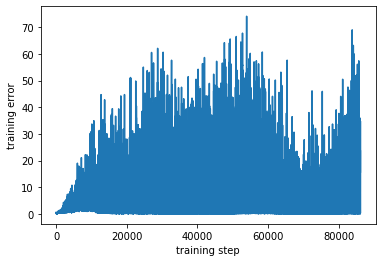

In [5]:
losses = dqn.training_losses
loss_ave = []
loss_std = []
for i in range(len(losses)-10):
  loss_ave.append(np.average(losses[i: i+10]))
  loss_std.append(np.std(losses[i: i+100]))
plt.plot(loss_ave)
plt.xlabel("training step")
plt.ylabel("training error")

Text(0, 0.5, 'reward')

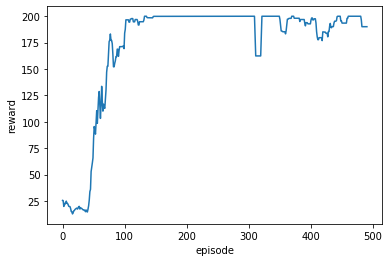

In [6]:
rewards = dqn.training_rewards
reward_ave = []
reward_std = []
for i in range(len(rewards)-10):
  reward_ave.append(np.average(rewards[i: i+10]))
plt.plot(reward_ave)
plt.xlabel("episode")
plt.ylabel("reward")

In [7]:
env = wrappers.Monitor(env, './videos/' + str(time()) + '/')
dqn.env = env
dqn.runOneEpisode(0, render=True, train=False)

200.0

In [8]:
env.close()